# Red Wine Quality
## Predecir la calidad del vino a partir de variables físicoquimicas y sensoriales

La base de datos contiene información de un tipo de vino específico (Vihno Verde portugues) que buscan relacionar la calidad de este vino con variables medibles.

Las varibles son las siguientes:

- 1 fixed acidity
- 2 volatile acidity
- 3 citric acid
- 4 residual sugar
- 5 chlorides
- 6 free sulfur dioxide
- 7 total sulfur dioxide
- 8 density
- 9 pH
- 10 sulphates
- 11 alcohol

Output variable (based on sensory data):

- 12 quality (score between 0 and 10) 

In [32]:
# SE CARGAN LAS LIBRERÍAS BÁSICAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Se carga la base de datos como data frame
df_total = pd.read_csv('../data/winequality-red.csv')

### Exploratory Data Analysis

#### Basic description of the data

In [5]:
df_total.shape

(1599, 12)

In [6]:
df_total.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df_total.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df_total.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_total.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
# Tomas 5 muestras aleatorias
from random import sample
randomIndex = np.array(sample(range(len(df_total)), 5))

digitalSample = df_total.iloc[randomIndex, ]

In [12]:
digitalSample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6
733,7.0,0.450,0.34,2.7,0.082,16.0,72.0,0.99800,3.55,0.60,9.5,5
950,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
1246,7.4,0.740,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0,5
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6


De lo observado por ahora de la base no se aprecia nada especialmente raro. Se verificó el tipo de datos de cada columna y se comprueba que no es necesario realizar ninguna transformación.

In [19]:
# Se observa si existen observaciones duplicadas 
df_total.duplicated().value_counts()

False    1359
True      240
dtype: int64

Se observan 240 observaciones que están repetidas. Estas se podrían interpretar como valores duplicados, sin embargo sin un identificador de fila no es totalmente imposible que las muestras duplicados sean de vinos distintos y la duplicidad sea solo una coincidencia.

Suponinendo esto se determina que los valores duplicados se van a mantener.

In [17]:
# Este sería el código a utilizar en caso de querer sacar estas muestras:
# df_total.drop_duplicates(inplace=True)

#### Queries
Se deja esta sección para evaluar si existen inconsistencias en los datos.

In [20]:
# 1. Existen muestras donde el SO2 libre sea mayor al total?
df_total.query("`total sulfur dioxide` < `free sulfur dioxide`")

# No se observan muestras así, que es lo esperado para este caso

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [23]:
# 2. existen pH que se pasen de los límites?

print('El pH mínimo es de {1:.1f} mientras que el máximo es de {2:.1f}.'.
      format(df_total.pH.min(), df_total.pH.max()))

# Al encontrarse entre 1 y 12 no hay problema con estos datos

El pH mínimo es de 2.7 mientras que el máximo es de 4.0.


#### Tratamiento de Missing Data

In [74]:
# Primero vemos si existen valores faltantes
df_total.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

En este caso pd.isnull devuekve un data frame con valor True en caso de que sea nan y False en caso de que no lo sea, mientras que pd.any comprueba si en alguna de las columnas existe un valor True.

Como se puede ver no existen valores faltantes

### Identificación de patrones en los datos

#### Cantidad de observaciones por valor de calidad
Nos permite ver que tan pareja está distribuida la base de datos y si existe algún desbalance en los resultados.

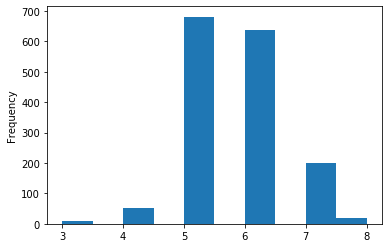

In [218]:
df_total.quality.plot(kind='hist');

Se observa un claro desbalance en los resultados de calidad, donde la gran mayoria de los resultados pertenecen a las calidades con valor 5 y 6.

#### Es verdad que los sulfitos disminuyen la calidad del vino

Se suelen preferir los vinos libres de sulfitos ya que se dice que estos disminuyen su calidad. Por otro lado la presencia de sulfitos se debe al uso de preservantes, los cuales naturalmente ayudarían a mantener la calidad del vino en el tiempo.

Para ello observaremos si existe relación alguna entre la calidad y el sulfito total/libre

Text(0, 0.5, 'SO2 Total')

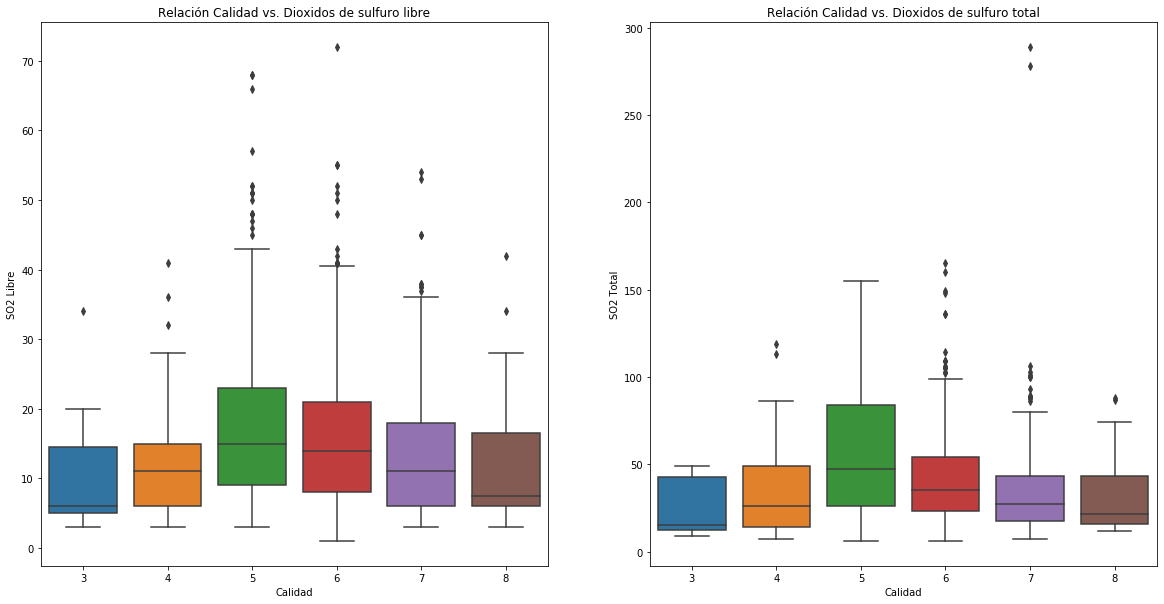

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

sns.boxplot(x='quality', y='free sulfur dioxide', data=df_total, ax=ax[0])
ax[0].set_title('Relación Calidad vs. Dioxidos de sulfuro libre')
ax[0].set_xlabel('Calidad')
ax[0].set_ylabel('SO2 Libre')

sns.boxplot(x='quality', y='total sulfur dioxide', data=df_total, ax=ax[1])
ax[1].set_title('Relación Calidad vs. Dioxidos de sulfuro total')
ax[1].set_xlabel('Calidad')
ax[1].set_ylabel('SO2 Total')

En ambos casos se aprecia una situación similar, en la que el sulfuro vs la calidad sigue una figura tipo 'campada de gauss', donde hay vinos de baja calidad debido a la baja cantidad de preservantes, hay vinos de calidad media que se ven beneficiados de una alta cantidad de sulfuro y vinos de calidad alta, que no requieren de químicos para mantener la calidad.

Esto refleja la caracteristica dual del sulfuro, el cual ayuda a preservar pero por otro lado disminuye su calidad.

#### Existe alguna relación entre la presencia de sales de cloro con la calidad del vino
El cloruro (chlorides) es la forma ionica del cloro, y suele encontrarse asociado a sales. La cantidad de cloruro que contiene el vino viene determinado por caracteristicas como la cepa, el suelo y el clima de cultivo.

Por lo tanto el cloruro podría asociarse a las condiciones de cultivo y me diante ello determinar si existen mejores condiciones de cultivo que otras.

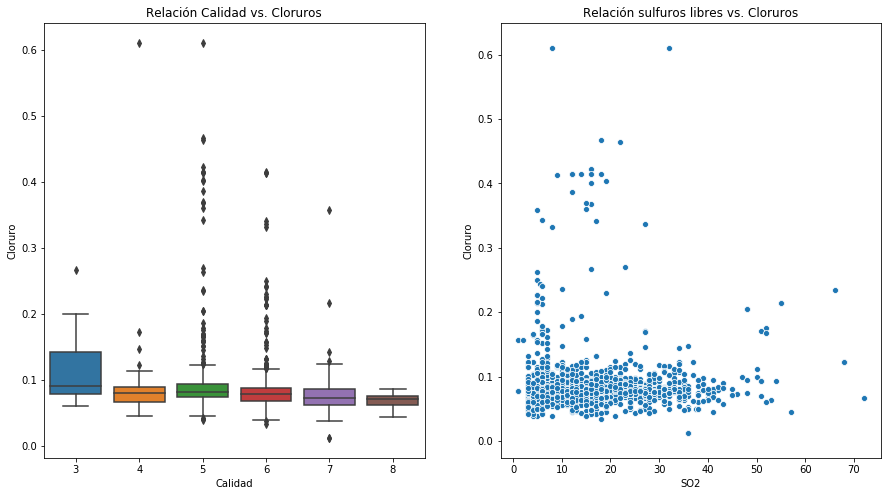

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='quality', y='chlorides', data=df_total, ax=ax[0])
ax[0].set_title('Relación Calidad vs. Cloruros')
ax[0].set_xlabel('Calidad')
ax[0].set_ylabel('Cloruro')

sns.scatterplot(x='free sulfur dioxide', y='chlorides', data=df_total, ax=ax[1])
ax[1].set_title('Relación sulfuros libres vs. Cloruros')
ax[1].set_xlabel('SO2')
ax[1].set_ylabel('Cloruro');

A pesar de la alta cantidad de outliners a medidas de calidad media, se observa una clara diferencia al tratar con la medida de calida más baja, en la que se observa una mediana y un espacio intercuartil notablemente diferenciado del resto.

Viendo si existe alguna relación con la variable de sulfuro, no se observa nada específico.

#### Influencia de los acidos volatiles en la calidad del vino
Los acidos volátiles son una medida de los acidos que bajo la acción de la temperatura se volatilizan (evaporan). Corresponden a una mezcla de distintos compuestos, de ellos el acido acético es el principal y el que se encuentra normalmente en mayores cantidades.

El acido acético es el compuesto principal del vinagre, sin embargo en las concentraciones en que se encuentra en el vino no suele ser perceptible para los humanos. 

Algo importante a destacar es que el acido acético puede actuar como preservante, ayudando en cierta medida a mantener la calidad de este.

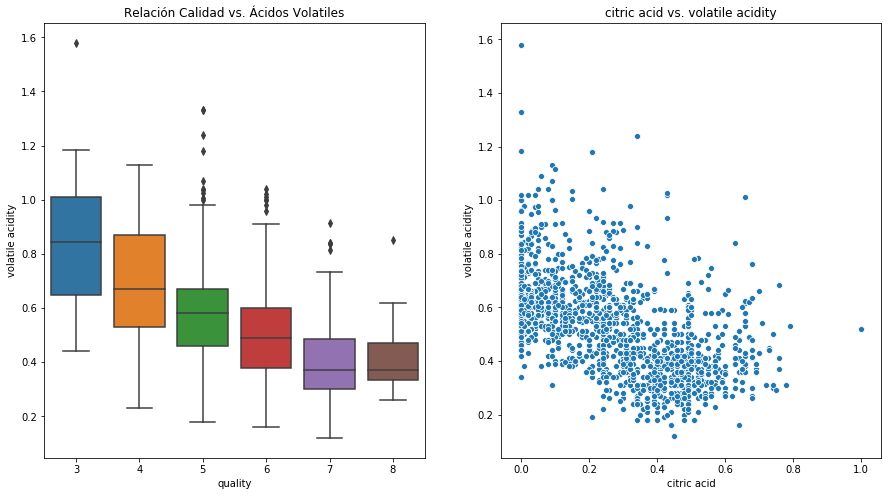

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='quality', y='volatile acidity', data=df_total, ax=ax[0])
ax[0].set_title('Relación Calidad vs. Ácidos Volatiles')
ax[0].set_xlabel('quality')
ax[0].set_ylabel('volatile acidity')

sns.scatterplot(x='citric acid', y='volatile acidity', data=df_total, ax=ax[1])
ax[1].set_title('citric acid vs. volatile acidity')
ax[1].set_xlabel('citric acid')
ax[1].set_ylabel('volatile acidity');

A diferencia de lo esperado, se observa una tendencia inversamente proporcional, donde en la medida que aumenta la concentración de los ácidos volatiles disminuye la calidad del vino.

Es posible que la presencia de ácidos volatiles sea un indicador de que el vino se está estropeando, por ello la disminución de calidad.

Creyendo que la presencia de ácidos volatiles se puede deber al metabolismo de otros compuestos, se estudia la relación entre este y el alcohol, el azucar residual y el ácido cítrico, tras lo cual se encuentra una clara relación inversamente proporcional con este último.

### PREDICCIÓN DE LA CALIDAD POR MEDIO DE CLASIFICADORES
En la siguiente sección se pueban distintos modelos clasificadores en busqueda de un método para poder predecir la calidad del vino por medio de un set de las variables totales contenidas en la base.



#### DIVISIÓN DE LOS DATOS
Se parte dividiendo los datos entre test y train on una proporción de 25/75.


In [256]:
from sklearn.model_selection import train_test_split

X = df_total.loc[:,df_total.columns != 'quality'].values
y = df_total.quality.values

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

In [258]:
# Antes de realizar las prediciones se recomendable escalar las variables.
# Existen algoritmos en los que es necesario normalizar los datos. Por ejemplos en
# los que se basan en calcular la distancia entre dos puntos. Si una de las variables
# tiene un alto rango de valores, entonces puede afectar más que otras variables. 
# Al normalizar se soluciona esto.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # Computa la media y la desviación estandar para ser usada luego

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Debería hacer lo mismo pero con la variable a predecir?

#### CLASIFICADOR KNN

In [81]:
# Se genera el estimador inicial con vecindades de 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [105]:
# Se entrena
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [121]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [106]:
# Y se realizan predicciones
predict_knn1 = knn.predict(X_test)

In [107]:
# Las predicciones se evaluan comparandolas con los resultados reales (y_test)
# y se genera una tabla de confusión para ello.
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predict_knn1))
print(classification_report(y_test, predict_knn1))


[[  0   0   1   1   0   0]
 [  0   2   4   8   0   0]
 [  0   3 117  41   7   1]
 [  0   2  42 106  18   2]
 [  0   0   2   7  27   4]
 [  0   0   1   2   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.14      0.19        14
           5       0.70      0.69      0.70       169
           6       0.64      0.62      0.63       170
           7       0.50      0.68      0.57        40
           8       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.63      0.63      0.63       400



C:\Users\sgonzalezg\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ver si es posible mejorar los resultados con cross-validation

In [250]:
# Tomando como base principal de evaluación, el valor de accuracy 
# (El total de positivos partido por le total de casos)
# se construye una función que obtenga este dato para múltiples valores
# de vecinadaes y devuelva una figura

import sklearn.metrics

def accuracy_df(X_train, X_test, y_train, y_test, 
                neighbors_list, metric, 
                weights='uniform'):

    # Se genera un modelo para cada número de vecindad  y se almacena 
    model_list = [KNeighborsClassifier(n_neighbors=n, weights=weights).fit(X_train, y_train) 
                for n in neighbors_list]
    
    # Se obtiene la lista de predicciones
    predict_list = [model.predict(X_test) for model in model_list]
    
    # Se carga la métrica a utilizar
    met = getattr(sklearn.metrics, metric)
    
    # Se obtiene un diccionario de las accuracy
    acc_list = [met(y_test, prediction) for prediction in predict_list]
    acc_dict = {'neighbors':neighbors_list, 'accuracy score':acc_list}
    
    # Para finalizar se pasa a dataframe
    acc_df = pd.DataFrame.from_dict(acc_dict)
    
    return acc_df

In [209]:
# Se llama a la función definida anteriormente para crear las bases considerando dos métricas
# accuracy_score y balanced_accuracy_Score

df_acc = accuracy_df(X_train, X_test, y_train, y_test, 
                     list(range(1,1001)), 
                     'accuracy_score')

df_bal = accuracy_df(X_train, X_test, y_train, y_test, 
                     list(range(1,1001)), 
                     'balanced_accuracy_score')

Text(0, 0.5, 'accuray score')

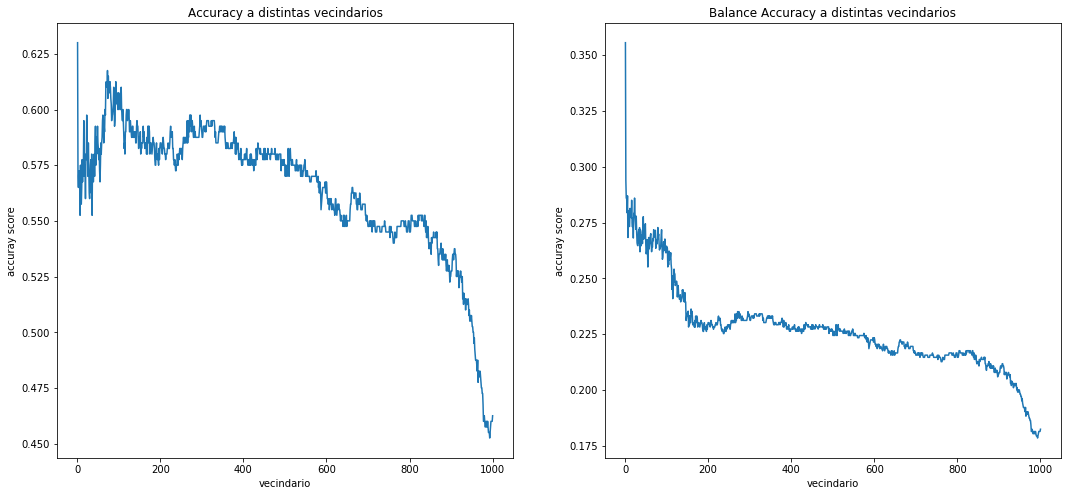

In [213]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.lineplot(x='neighbors', y='accuracy score', data=df_acc, ax=ax[0])
ax[0].set_title('Accuracy a distintas vecindarios')
ax[0].set_xlabel('vecindario')
ax[0].set_ylabel('accuray score')

sns.lineplot(x='neighbors', y='accuracy score', data=df_bal, ax=ax[1])
ax[1].set_title('Balance Accuracy a distintas vecindarios')
ax[1].set_xlabel('vecindario')
ax[1].set_ylabel('accuray score')

In [198]:
# dejando de lado la exactitud del modelo de n=1 el máximo y mínimo son
print('El valor máximo de accuracy es {} y se da con un vecindario de {}.'.
      format(df_acc.iloc[1:,1].max(), df_acc.neighbors[df_acc.iloc[1:,1].idxmax()]))

El valor máximo de accuracy es 0.6175 y se da con un vecindario de 73.


Para este ejemplo se usan como métricas la exactitud (Accuracy) y la exactitud balanceada. La exactitud balanceada es una modificación de la exactitud que tiene como ventaja el evitar los rendimiento inflados en datasets no balanceados, como es nuestro caso.

Como se puede ver, los mejores resultados se obtienen para vecindarios de 1. Acá no sé si sea recomendable tomar un vecindario tan pequeño, por eso termino seleccionando la segunda mejor opción, que se da con un vecindario de 73.

Olvidemos lo anterior y veamos si hay alguna forma de mejorar los resultados obtenidos con KNN puro. Se probará mediante los siguientes metodos:
- Modificando los parámetros.
- Realizando selección de variables.
- Feature Engineering?

In [251]:
# Realizamos la prueba cambiando el peso de los puntos al inverso de la distancia
df_acc = accuracy_df(X_train, X_test, y_train, y_test, 
                     list(range(1,1001)), 
                     'accuracy_score', 
                     'distance')

df_bal = accuracy_df(X_train, X_test, y_train, y_test, 
                     list(range(1,1001)), 
                     'balanced_accuracy_score', 
                     'distance')

Text(0, 0.5, 'accuray score')

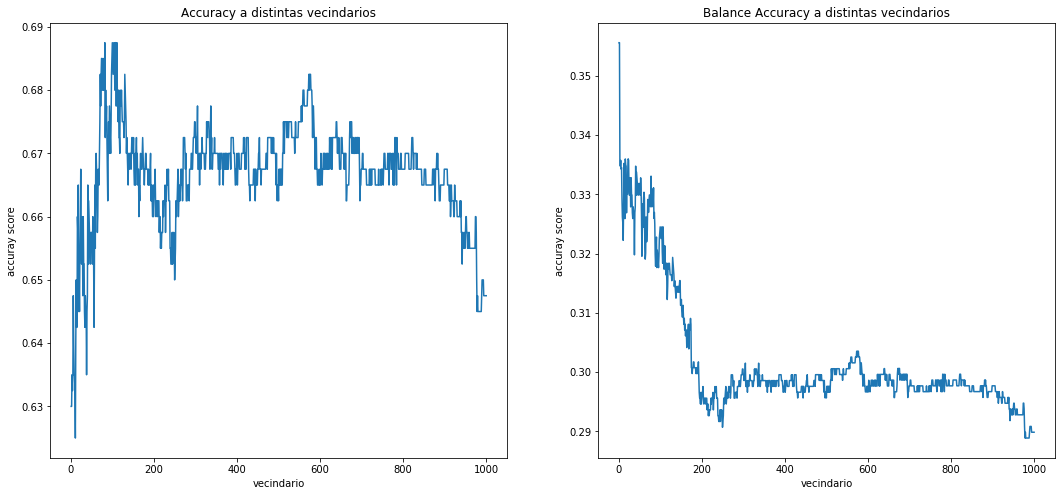

In [253]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.lineplot(x='neighbors', y='accuracy score', data=df_acc, ax=ax[0])
ax[0].set_title('Accuracy a distintas vecindarios')
ax[0].set_xlabel('vecindario')
ax[0].set_ylabel('accuray score')


sns.lineplot(x='neighbors', y='accuracy score', data=df_bal, ax=ax[1])
ax[1].set_title('Balance Accuracy a distintas vecindarios')
ax[1].set_xlabel('vecindario')
ax[1].set_ylabel('accuray score')

In [254]:
# Para este caso, tomando como métrica la accuracy tenemos como resultado
# dejando de lado la exactitud del modelo de n=1 el máximo y mínimo son
print('El valor máximo de accuracy es {} y se da con un vecindario de {}.'.
      format(df_acc.iloc[1:,1].max(), df_acc.neighbors[df_acc.iloc[1:,1].idxmax()]))

El valor máximo de accuracy es 0.6875 y se da con un vecindario de 82.


Para ambas métricas se observa una mejora en los resultados.

Dentro de las opciones que da KNeighborsClassifier esta la selección de la métrica de distancia, donde las opciones más usadas son la distancia Ecludiana y Manhattan. En los resultados ya expuestos se ha usado el default, que es la Ecludiana. No se planea probar con la distancia Manhattan.

Los otros parámetros de KNeighborsClassifier poco deberían afectar en los resultados, por lo no se realizaran pruebas modificandolos.

In [293]:
# A continuación se realizarán distintos acercamiento a la seleccion de variables
# Features Selection
# Para lo cual se usará el módulo de scikit-learn específico para esto


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_df = df_total.loc[:,df_total.columns != 'quality']
y_df = df_total.quality

# Se determina usar un total de 5 variables para el modelo 
X_new = SelectKBest(f_classif, k=5).fit_transform(X_df,y_df)


In [294]:
X_new

array([[7.00e-01, 0.00e+00, 3.40e+01, 5.60e-01, 9.40e+00],
       [8.80e-01, 0.00e+00, 6.70e+01, 6.80e-01, 9.80e+00],
       [7.60e-01, 4.00e-02, 5.40e+01, 6.50e-01, 9.80e+00],
       ...,
       [5.10e-01, 1.30e-01, 4.00e+01, 7.50e-01, 1.10e+01],
       [6.45e-01, 1.20e-01, 4.40e+01, 7.10e-01, 1.02e+01],
       [3.10e-01, 4.70e-01, 4.20e+01, 6.60e-01, 1.10e+01]])

In [302]:
df_total.loc[:,df_total.columns != 'quality'].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Comparando ambas de nota que las variables seleccionadas son 'volatile acidity', 'citric acid', 'total sulfur dioxide' y 'alcohol'.

Se procede a ralizar el mismo procedimiento descrito anteriormente para encontrar la exactitud.

In [303]:
df_new = df_total[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'alcohol', 'quality']]

X = df_new.loc[:,df_new.columns != 'quality'].values
y = df_new.quality.values

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

scaler = StandardScaler()
scaler.fit(X_train) # Computa la media y la desviación estandar para ser usada luego

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

df_acc = accuracy_df(X_train, X_test, y_train, y_test, 
                     list(range(1,1001)), 
                     'accuracy_score', 
                     'distance')


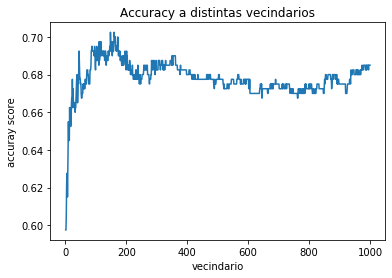

In [304]:
sns.lineplot(x='neighbors', y='accuracy score', data=df_acc)
plt.title('Accuracy a distintas vecindarios')
plt.xlabel('vecindario')
plt.ylabel('accuray score');

In [306]:
print('El valor máximo de accuracy es {} y se da con un vecindario de {}.'.
      format(df_acc.iloc[1:,1].max(), df_acc.neighbors[df_acc.iloc[1:,1].idxmax()]))

El valor máximo de accuracy es 0.7025 y se da con un vecindario de 148.


#### CLASIFICADOR RADIUS NEIGHBORS
Similar al KNN pero en vez de elegir un número de vecinos, se define un radio fijo. Suele ser una mejor opción cuando los datos no estan muestreada uniformemente (?). Debido al ratio fijo, en vecindarios escasos (datos alejados) se utilizan menos puntos para la clasificación.

Para bases con dimensionalidad alta de parámetros este método se vuelve menos efectivo debido a la "maldicion de la dimensionalidad".

In [ ]:
# Por completar

### PREDICCIÓN DE LA CALIDAD POR MEDIO DE REGRESIÓN


In [ ]:
# Por completar